# Classification of Music by Genre

Classification of music by genre.

First, some imports...

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

Set up dataset, dropping any columns that contain NaNs, and then selecting a variety of attributes to work with.

In [39]:
music = pd.read_csv("music.csv")
df = music[["Popularity", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "liveness", "valence", "tempo", "time_signature", "Class"]]
df = df.dropna(axis='index')

X = df[["Popularity", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "liveness", "valence", "tempo", "time_signature"]]
print(X.shape)
y = df["Class"]
print(y.shape)

print(df1.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)

(12183, 11)
(12183,)
(0, 11)


1.0
98.0


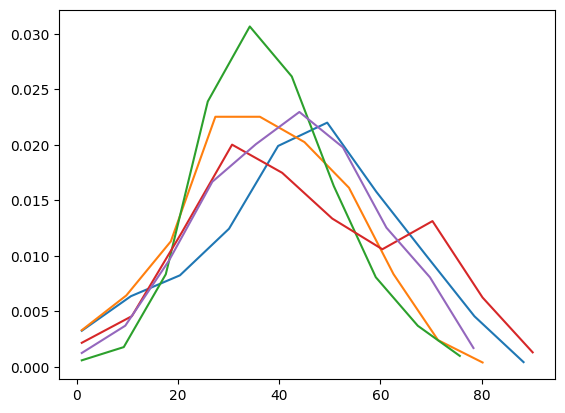

0.138
0.989


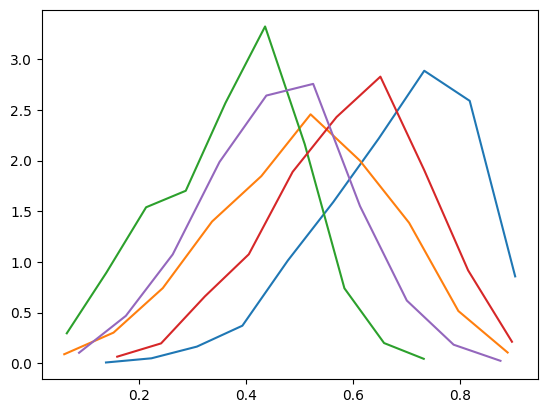

0.0412
0.985


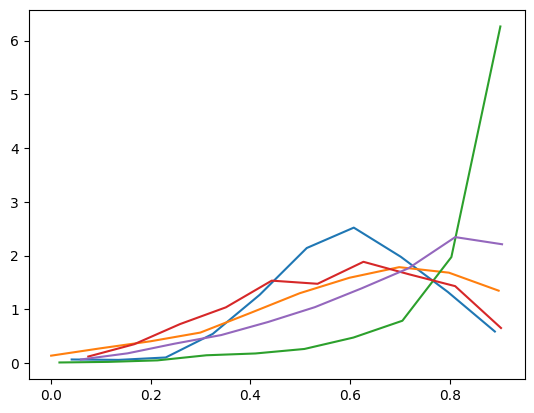

-26.964
0.119


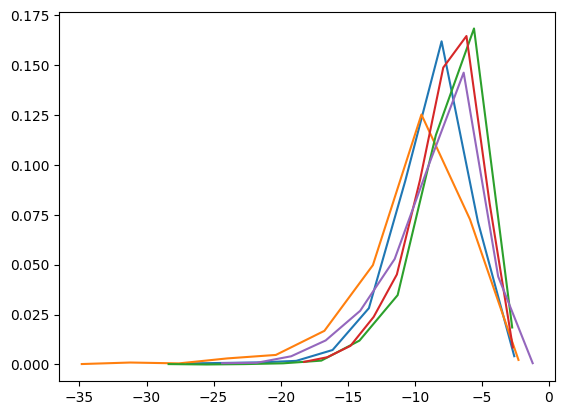

0
1


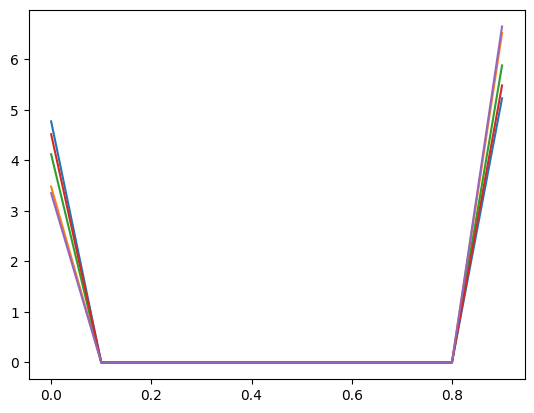

0.027
0.955


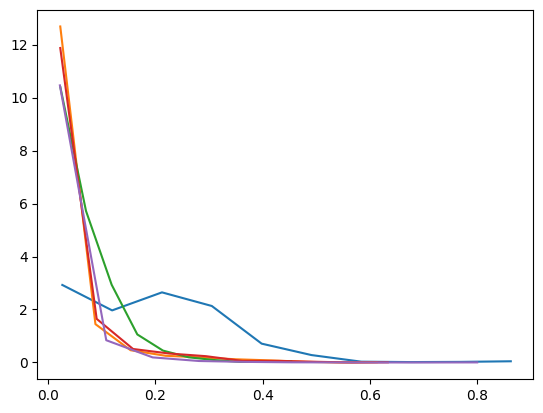

1.7100000000000002e-05
0.995


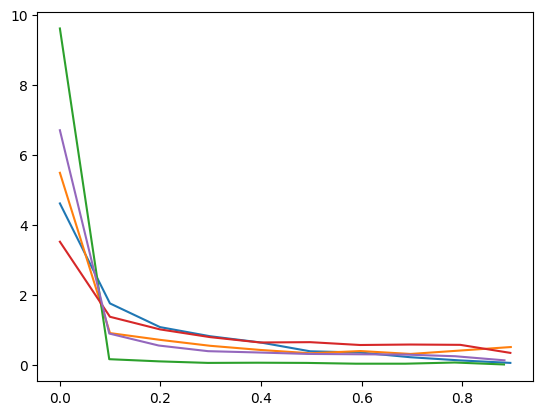

0.0219
0.951


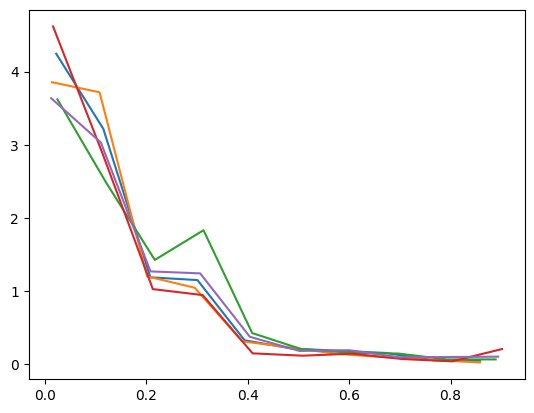

0.0379
0.973


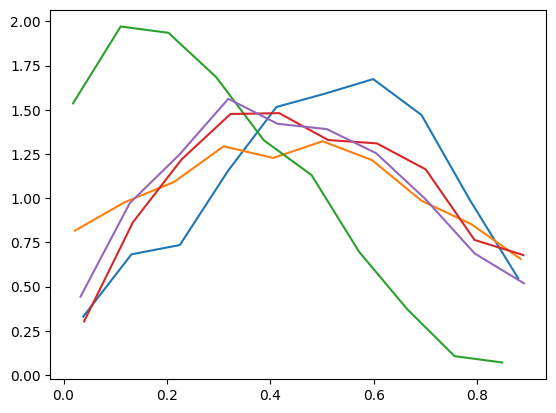

52.145
212.049


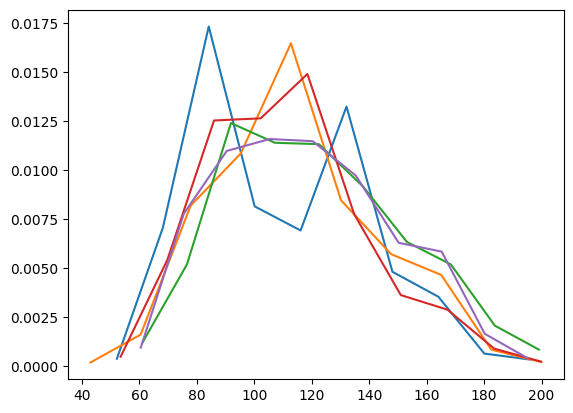

1
5


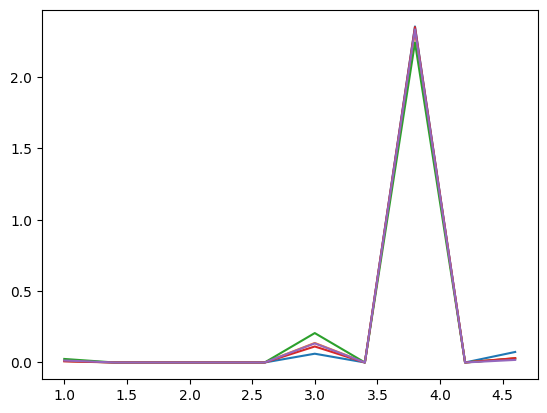

In [42]:
# Graph features
type5 = df[df.Class == 5]
type6 = df[df.Class == 6]
type8 = df[df.Class == 8]
type9 = df[df.Class == 9]
type10 = df[df.Class == 10]

for cat in ["Popularity", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "liveness", "valence", "tempo", "time_signature"]:
    print(min(type5[cat]))
    print(max(type5[cat]))
    hists = [np.histogram(type5[cat], density=True), 
             np.histogram(type6[cat], density=True), 
             np.histogram(type8[cat], density=True), 
             np.histogram(type9[cat], density=True), 
             np.histogram(type10[cat], density=True)]
    
    for j in range(len(hists)):
        plt.plot(hists[j][1][:-1], hists[j][0])
    plt.show()

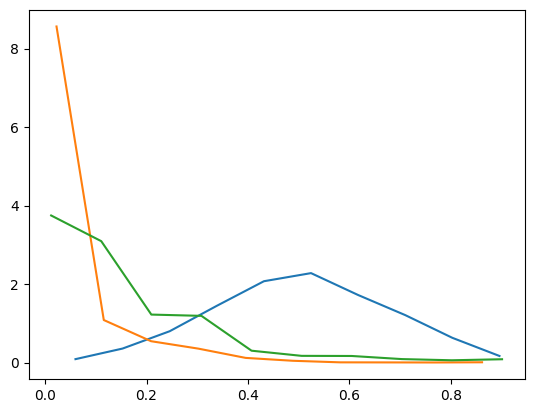

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

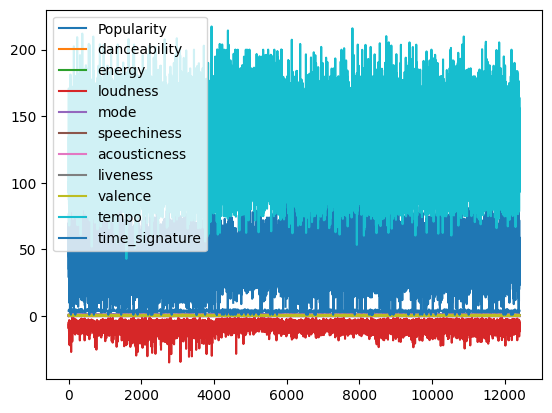

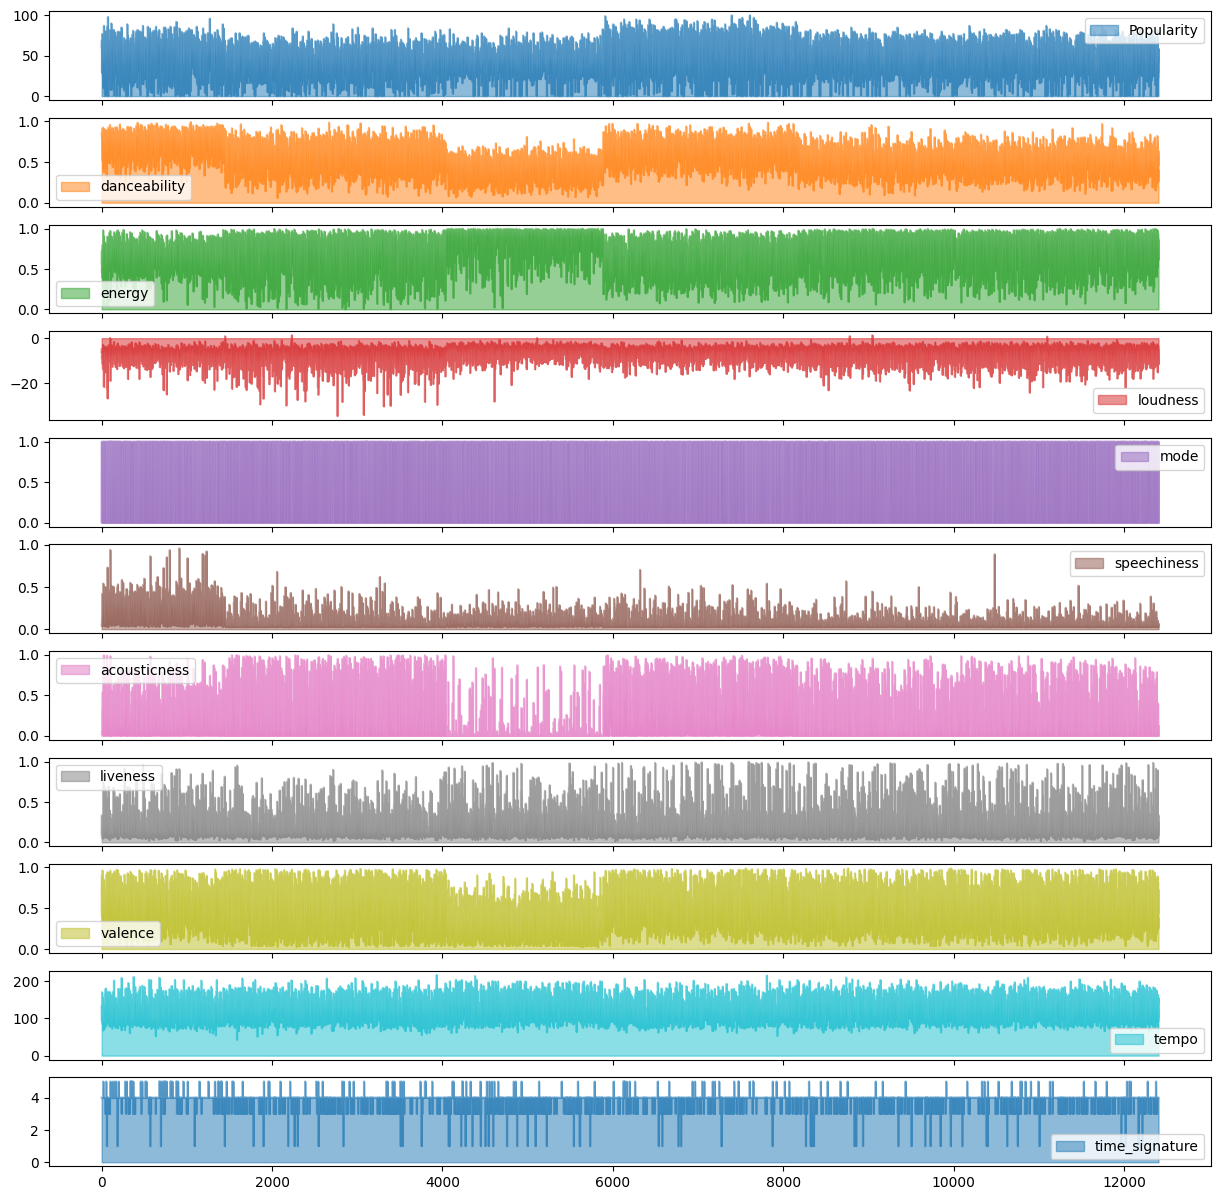

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
#for col in X.columns:
#    print(col)
#    hist = np.histogram(music[[col]], density=True)
#    plt.plot(hist[1][:-1], hist[0])
#    plt.show()
    
#dance_norm_hist = np.histogram(music[["Popularity"]], density=True)
dance_norm_hist = np.histogram(music[["danceability"]], density=True)
energy_norm_hist = np.histogram(music[["energy"]], density=True)
loudness_norm_hist = np.histogram(music[["loudness"]], density=True)
mode_norm_hist = np.histogram(music[["mode"]], density=True)
speechiness_norm_hist = np.histogram(music[["speechiness"]], density=True)

acousticness_norm_hist = np.histogram(music[["acousticness"]], density=True)
liveness_norm_hist = np.histogram(music[["liveness"]], density=True)
valence_norm_hist = np.histogram(music[["valence"]], density=True)
tempo_norm_hist = np.histogram(music[["tempo"]], density=True)
time_signature_norm_hist = np.histogram(music[["time_signature"]], density=True)
plt.plot(dance_norm_hist[1][:-1], dance_norm_hist[0])
#plt.plot(energy_norm_hist[1][:-1], energy_norm_hist[0])
#plt.plot(loudness_norm_hist[1][:-1], loudness_norm_hist[0])
#plt.plot(mode_norm_hist[1][:-1], mode_norm_hist[0])
plt.plot(speechiness_norm_hist[1][:-1], speechiness_norm_hist[0])
#plt.plot(acousticness_norm_hist[1][:-1], acousticness_norm_hist[0])
plt.plot(liveness_norm_hist[1][:-1], liveness_norm_hist[0])
#plt.plot(valence_norm_hist[1][:-1], valence_norm_hist[0])
#plt.plot(tempo_norm_hist[1][:-1], tempo_norm_hist[0])
#plt.plot(time_signature_norm_hist[1][:-1], time_signature_norm_hist[0])
plt.show()

X.plot()
X.plot.area(figsize=(15, 15), stacked=False, subplots=True)

['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']
(12183, 11)
(12183,)


array([[<AxesSubplot: xlabel='Popularity', ylabel='Popularity'>,
        <AxesSubplot: xlabel='danceability', ylabel='Popularity'>,
        <AxesSubplot: xlabel='energy', ylabel='Popularity'>,
        <AxesSubplot: xlabel='loudness', ylabel='Popularity'>,
        <AxesSubplot: xlabel='mode', ylabel='Popularity'>,
        <AxesSubplot: xlabel='speechiness', ylabel='Popularity'>,
        <AxesSubplot: xlabel='acousticness', ylabel='Popularity'>,
        <AxesSubplot: xlabel='liveness', ylabel='Popularity'>,
        <AxesSubplot: xlabel='valence', ylabel='Popularity'>,
        <AxesSubplot: xlabel='tempo', ylabel='Popularity'>,
        <AxesSubplot: xlabel='time_signature', ylabel='Popularity'>],
       [<AxesSubplot: xlabel='Popularity', ylabel='danceability'>,
        <AxesSubplot: xlabel='danceability', ylabel='danceability'>,
        <AxesSubplot: xlabel='energy', ylabel='danceability'>,
        <AxesSubplot: xlabel='loudness', ylabel='danceability'>,
        <AxesSubplot: xlabel='mod

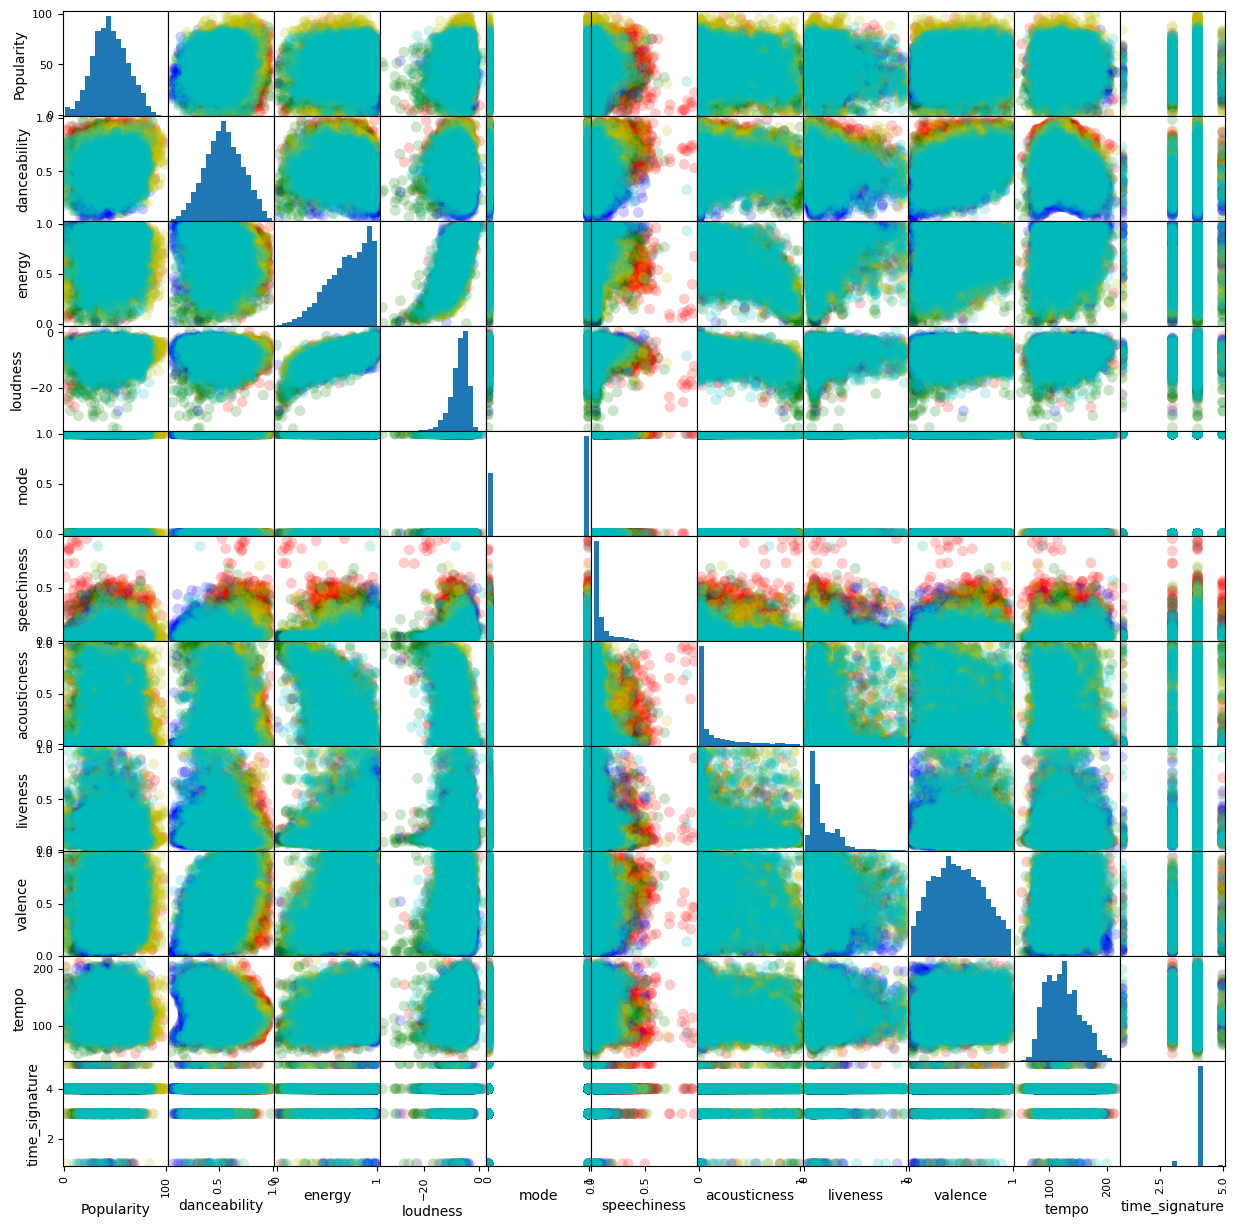

In [44]:
color_map = {5:'r', 6:'g', 8:'b', 9:'y', 10:'c'}
#y.apply(lambda yn : yn = color_map[y])
colors = [color_map[yn] for yn in y]
print(colors[:10])
print(X.shape)
print(y.shape)
#dataframe = pd.DataFrame(X, columns=[["Popularity", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "liveness", "valence", "tempo", "time_signature"]])
pd.plotting.scatter_matrix(X, c=colors, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.2)


Let's just skip attempting to look at the data for now and try to train a model.

## KNN

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.29
